In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
df = pd.read_csv("C:/Users/Sai Prashanth/Desktop/PRACTICAL ENGINEERS/BP_DAT.csv")

In [36]:
df.head()

,SNO,NAME,R2R_TIME,PTT,S2S_TIME,CREST_TIME,SBP,DBP,REF
0,1,xxx,0.50,0.20,0.74,0.18,122,81,san
1,2,aaa,0.58,0.22,0.80,0.14,120,85,NaN
2,3,bbb,0.68,0.24,0.88,0.16,124,83,NaN
3,4,ccc,0.64,0.24,0.86,0.18,124,83,NaN
4,5,ddd,0.58,0.24,0.82,0.16,123,84,NaN


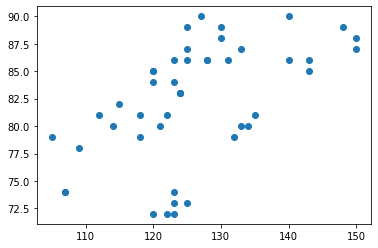

In [37]:
cdf = df[['NAME','R2R_TIME','PTT','S2S_TIME','CREST_TIME','SBP','DBP']]
df.head()
df.sort_values("SBP",axis=0,ascending = True,inplace = True,na_position = 'last')
df.sort_values("DBP",axis=0,ascending = True,inplace = True,na_position = 'last')
df
plt.scatter(df['SBP'],df['DBP'])
plt.show()

In [38]:
#viz = cdf[['MODEL','CO2EMISSIONS']]
#viz.hist()
#plt.show()
print(df['R2R_TIME'].corr(df['SBP']))
print(df['R2R_TIME'].corr(df['DBP']))
print(df['PTT'].corr(df['SBP']))
print(df['PTT'].corr(df['DBP']))
print(df['S2S_TIME'].corr(df['SBP']))
print(df['S2S_TIME'].corr(df['DBP']))
print(df['CREST_TIME'].corr(df['SBP']))
print(df['CREST_TIME'].corr(df['DBP']))



-0.15989738437748502
-0.1158837443780689
-0.27297678696621863
-0.6877398552899616
-0.258395022817189
-0.5659446784289057
-0.21812461005341366
0.155191566329663


In [7]:
'''m = np.random.rand(len(df))<0.8
train = cdf[m]
test = cdf[~m]'''

'm = np.random.rand(len(df))<0.8\ntrain = cdf[m]\ntest = cdf[~m]'

In [63]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
regr1 = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()

df = pd.read_csv("C:/Users/Sai Prashanth/Desktop/PRACTICAL ENGINEERS/BP_DAT.csv")
sdf = df[['R2R_TIME','PTT','S2S_TIME','CREST_TIME','SBP']]
ddf = df[['R2R_TIME','PTT','S2S_TIME','CREST_TIME','DBP']]
sdf.sort_values("SBP",axis=0,ascending = True,inplace = True,na_position = 'last')
ddf.sort_values("DBP",axis=0,ascending = True,inplace = True,na_position = 'last')

X1 = pd.DataFrame(sdf,columns = ['R2R_TIME','PTT','S2S_TIME','CREST_TIME'])
X2 = pd.DataFrame(ddf,columns = ['R2R_TIME','PTT','S2S_TIME','CREST_TIME'])

y1 = sdf[['SBP']]
y2 = ddf[['DBP']]

 
train_X,test_X,train_Y,test_Y = train_test_split(X1,y1,test_size=0.4,random_state=5)
X_train,X_test,Y_train,Y_test = train_test_split(X2,y2,test_size=0.4,random_state=5)

"""train_X = np.asanyarray(train[['ENGINESIZE','CYLINDERS']])
train_Y = np.asanyarray(train[['CO2EMISSIONS']])
test_X = np.asanyarray(test[['ENGINESIZE','CYLINDERS']])
test_Y = np.asanyarray(test[['CO2EMISSIONS']])"""

regr1.fit(train_X,train_Y)
regr2.fit(X_train,Y_train)
train_Y_ = regr1.predict(train_X)
test_Y_ = regr1.predict(test_X)
Y_train_ = regr2.predict(X_train)
Y_test_ = regr2.predict(X_test)
df

<ipython-input-63-793666bd0c10>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf.sort_values("SBP",axis=0,ascending = True,inplace = True,na_position = 'last')
<ipython-input-63-793666bd0c10>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ddf.sort_values("DBP",axis=0,ascending = True,inplace = True,na_position = 'last')


,SNO,NAME,R2R_TIME,PTT,S2S_TIME,CREST_TIME,SBP,DBP,REF
0,1,xxx,0.50,0.20,0.74,0.18,122,81,san
1,2,aaa,0.58,0.22,0.80,0.14,120,85,NaN
2,3,bbb,0.68,0.24,0.88,0.16,124,83,NaN
3,4,ccc,0.64,0.24,0.86,0.18,124,83,NaN
4,5,ddd,0.58,0.24,0.82,0.16,123,84,NaN
5,6,eee,0.62,0.24,0.82,0.16,121,80,NaN
6,7,fff,0.66,0.22,0.82,0.16,124,83,NaN
7,8,ggg,0.52,0.28,0.76,0.28,130,88,kal
8,9,hhh,0.52,0.24,0.74,0.24,128,86,NaN
9,10,iii,0.52,0.24,0.76,0.24,128,86,NaN


In [64]:
print('COEFF_sys:',regr1.coef_)
print('INTERCEPTS_sys:',regr1.intercept_)
print('COEFF_dia:',regr2.coef_)
print('INTERCEPTS_dia:',regr2.intercept_)
#print(test_X[:25])

print(test_Y_)
print(test_Y)

print(Y_test_)
print(Y_test)

COEFF_sys: [[-29.81521857 -25.48665303  -4.61417447 -20.59510387]]
INTERCEPTS_sys: [160.0593023]
COEFF_dia: [[ -1.19858168 -30.37690498 -21.47401906   8.02195932]]
INTERCEPTS_dia: [105.70313442]
[[130.08127789]
 [132.47237224]
 [134.40237851]
 [124.69185451]
 [124.08983796]
 [134.43475734]
 [130.58475775]
 [134.90639939]
 [124.99293638]
 [125.60777747]
 [131.41497979]
 [128.98008225]
 [133.42551582]
 [123.62147284]
 [128.37823038]
 [134.31009502]
 [126.30762501]
 [131.32857316]
 [128.14572412]]
    SBP
8   128
42  128
41  122
14  125
15  126
38  125
1   120
22  140
29  120
12  128
44  120
32  134
43  119
30  125
5   121
17  150
13  130
19  150
7   130
[[81.80172642]
 [82.26889701]
 [79.19351025]
 [86.59257551]
 [79.9840184 ]
 [84.58164116]
 [68.93193351]
 [82.50023268]
 [68.99013306]
 [83.4272237 ]
 [71.92168074]
 [82.64162788]
 [72.15403483]
 [81.90396928]
 [66.09627236]
 [81.55809158]
 [83.3944305 ]
 [85.55555703]
 [84.67262463]]
    DBP
40   85
1    85
15   74
41   81
2    83
0    8

(14,) (14, 2)
(14,) (14, 2)
(14,) (14, 2)
(14,) (14, 2)


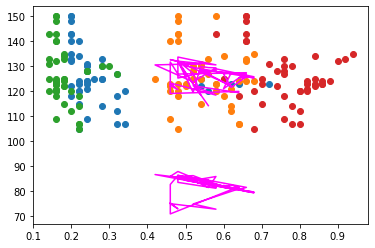

[[128.24321514  82.18738259]]


In [49]:
#plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS)
#plt.scatter(df[['R2R_TIME','PTT']],y)
#plt.scatter(df[['S2S_TIME','CREST_TIME']],y)
#plt.plot(df[['R2R_TIME']][:20],train_Y_[0])
#plt.scatter(train_Y,train_Y_)
#train_Y = np.reshape(train_Y,(-1,1))
#for col1 in train_X.columns:
 #   plt.scatter(train_X[col1],train_Y,'blue');

#print(train_X[col].shape,train_Y[:,1].shape)
train_Y = np.asmatrix(train_Y)
#print(train_X[col].shape,train_Y[:,-1].shape)

#for col1 in X.columns:
plt.scatter(df.PTT,df.SBP);
plt.scatter(df.R2R_TIME,df.SBP);
plt.scatter(df.CREST_TIME,df.SBP);
plt.scatter(df.S2S_TIME,df.SBP);

""""plt.scatter(df[['PTT']],df[['DBP']]);
plt.scatter(df[['R2R_TIME']],df[['DBP']]);
plt.scatter(df[['CREST_TIME']],df[['DBP']]);
plt.scatter(df[['S2S_TIME']],df[['DBP']]);"""

i = 0;
for col in X.columns:
    if(i==0):
        plt.plot(X[col],regr.predict(X),'magenta');
        #plt.plot(test_X[col],test_Y);
    print(test_X[col].shape,test_Y_.shape);
    i+=1
#plt.scatter(train_X,train_Y_)
#plt.plot(X[40:55],y[40:55])
#plt.plot(X[40:55],regr.predict(X[40:55]))
#print(X[40:55])
#print(y[40:55])
#plt.plot(df[['R2R_TIME','PTT']][:20],train_Y_)
#plt.plot(df[['S2S_TIME','CREST_TIME']][:20],train_Y_)
plt.show()
nw = [[0.58,0.22,0.8,0.169]]
print(regr.predict(nw))

#plt.plot(test_X[:25],test_Y[:25])
#plt.plot(train_Y_[1][0],'-r')
#plt.plot(test_X[:25],test_Y_[:25],'-r')
#plt.plot(train_X,regr.coef_[0][0]*train_X[0][1] + regr.intercept_,'-r')



In [65]:
error = np.mean(np.absolute(test_Y_ - test_Y)).astype(float)
mse = np.mean(np.absolute(test_Y_ - test_Y)**2).astype(float)
#r2 = .astype(float)

print("ERROR: {}".format(error))
print("MSE: {}".format(mse))
print("R2_SCORE_SYS: %.2f"%r2_score(test_Y,test_Y_))
print("R2_SCORE_DIA: %.2f"%r2_score(Y_test,Y_test_))


ERROR: SBP    7.010409
dtype: float64
MSE: SBP    77.439362
dtype: float64
R2_SCORE_SYS: 0.05
R2_SCORE_DIA: 0.54
